In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk 
import string 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df=pd.read_csv('/content/browser_rankings_data.csv', encoding= 'unicode_escape')
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [ ]:
df.shape

(3066, 10)

In [ ]:
df.isnull().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
import emoji
def deEmojify(inputString):
    cleanedArticle=emoji.demojize(inputString, delimiters=("", ""))
    return cleanedArticle

In [ ]:
df['Short Description_text']=df['Short Description'].apply(lambda x:deEmojify(x))
df['Long Description_text']=df['Long Description'].apply(lambda x:deEmojify(x))


In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)




df['Short Description_text']=df['Short Description_text'].apply(lambda x:expand_contractions(x))
df['Long Description_text']=df['Long Description_text'].apply(lambda x:expand_contractions(x))


In [ ]:
def cleaning(Inpdata):
    cleanedArticle1=re.sub(r"[,.;@#?!&$]+\ *", " ", Inpdata)
    cleanedArticle2=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle1)
    cleanedArticle3=re.sub(r' +', ' ',cleanedArticle2)
    cleanedArticle4=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle3)
    cleanedArticle5=cleanedArticle4.replace("  ", "")
    cleanedArticle6=cleanedArticle5.lower()
    return(cleanedArticle6)

In [ ]:
df['Short Description_clean']=df['Short Description_text'].apply(lambda x:cleaning(x))
df['Long Description_clean']=df['Long Description_text'].apply(lambda x:cleaning(x))


In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
df['Short Description_clean']=df['Short Description_clean'].apply(lambda x:lemmatize_words(x))
df['Long Description_clean']=df['Long Description_clean'].apply(lambda x:lemmatize_words(x))

In [ ]:
df=df.drop(labels=['Short Description','Long Description','Short Description_text','Long Description_text'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3050 non-null   int64  
 1   Keyword                          3050 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3050 non-null   object 
 4   Language                         3050 non-null   object 
 5   Date                             3050 non-null   object 
 6   App ID                           3050 non-null   object 
 7   Date of Last Description Change  3050 non-null   object 
 8   Short Description_clean          3050 non-null   object 
 9   Long Description_clean           3050 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 262.1+ KB


In [ ]:
df['Date of Last Description Change']=pd.to_datetime(df['Date of Last Description Change'])
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df=df.drop(labels=['Country','Language'], axis=1)

In [ ]:
df.nunique()

ID                                 2072
Keyword                               7
Rank                                119
Date                                 76
App ID                                8
Date of Last Description Change       6
Short Description_clean               8
Long Description_clean               13
dtype: int64

In [ ]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def sent_simalirity(text1,text2):
    embedding_1 = model.encode(text1)
    embedding_2= model.encode(text2)
    cosine_scores= util.cos_sim( embedding_1, embedding_2)
    cos_score=cosine_scores.numpy().ravel().round(2)
    return cos_score

In [ ]:
score_list=[]
for index, row in df.iterrows():
        score_list.append(sent_simalirity(row['Short Description_clean'], row['Long Description_clean']))

In [141]:
#df['cos_score']=score_list
#df=df.drop(labels=['cos_score'], axis=1)
df['sent_score']= score_list

In [142]:
df['sent_score']=df['sent_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 3065
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3050 non-null   int64         
 1   Keyword                          3050 non-null   object        
 2   Rank                             3050 non-null   float64       
 3   Date                             3050 non-null   datetime64[ns]
 4   App ID                           3050 non-null   object        
 5   Date of Last Description Change  3050 non-null   datetime64[ns]
 6   Short Description_clean          3050 non-null   object        
 7   Long Description_clean           3050 non-null   object        
 8   sent_score                       3050 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 302.8+ KB


In [147]:
df.head(20)

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description_clean,Long Description_clean,sent_score
0,1,browser,2.0,2020-12-16,net fast web browser,2020-12-18,the small fast secure web browser best mobile ...,one of the small fast secure web browserit be ...,83.0
1,2,browser,3.0,2020-12-16,com android chrome,2020-12-18,fast simple and secure google chrome browser f...,google chrome be a fast easy to use and secure...,75.0
2,3,browser,4.0,2020-12-16,com opera browser,2021-02-27,fast safe web browserfree vpn ad blocker qr co...,fast safe and private introduce the late versi...,71.0
3,3,browser,4.0,2020-12-16,com opera browser,2020-12-18,fast safe web browserfree vpn ad blocker qr co...,opera be a fast safe web browser for your andr...,78.0
4,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2021-07-02,puffin tv browser one app to watch all video o...,puffin tv browser be a special edition of puff...,72.0
5,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2021-06-02,puffin tv browser one app to watch all video o...,puffin tv browser be a special edition of puff...,65.0
6,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2021-01-21,puffin tv browser one app to watch all video o...,puffin tv browser be a special edition of puff...,70.0
7,4,browser,1.0,2020-12-16,com cloudmosa puffinTV,2020-12-18,puffin tv browser one app to watch all video o...,puffin tv browser be a special edition of puff...,70.0
8,5,android browser,11.0,2020-12-16,net fast web browser,2020-12-18,the small fast secure web browser best mobile ...,one of the small fast secure web browserit be ...,83.0
9,6,android browser,8.0,2020-12-16,com android chrome,2020-12-18,fast simple and secure google chrome browser f...,google chrome be a fast easy to use and secure...,75.0


In [144]:
def cleaning_1(Inpdata):
    cleanedArticle=re.sub(r"[,.;@#?!&$]+\ *", " ", Inpdata)
    return cleanedArticle

In [145]:
df['App ID']=df['App ID'].apply(cleaning_1)


In [138]:
#df =df.drop(labels=['sent_score_mean_rank'], axis=1)

In [146]:
df['sent_score']=np.round(df['sent_score']*100,0)

In [148]:
df['sent_score_mean_rank']=df.groupby('Rank')['sent_score'].transform('mean')

In [149]:
df_sim_rank=pd.DataFrame()
df_sim_rank['Rank']=df['Rank'].unique().tolist()
df_sim_rank['sent_score_sum']=df.groupby(['Rank'])['sent_score_mean_rank'].transform('sum')

Rank
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
5      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
116    AxesSubplot(0.125,0.125;0.775x0.755)
117    AxesSubplot(0.125,0.125;0.775x0.755)
118    AxesSubplot(0.125,0.125;0.775x0.755)
119    AxesSubplot(0.125,0.125;0.775x0.755)
134    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sent_score_sum, Length: 118, dtype: object

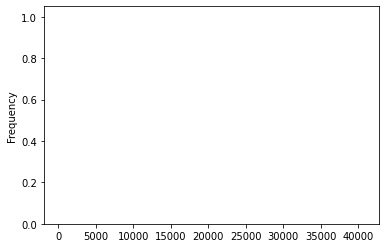

In [180]:
#df_sim_rank=df_sim_rank.dropna()
df_sim_rank['Rank']=df_sim_rank['Rank'].astype('int')
df_sim_rank['sent_score_sum']=df_sim_rank['sent_score_sum'].astype('int')
df_sim_rank =df_sim_rank.sort_values(by='sent_score_sum', ascending=False)

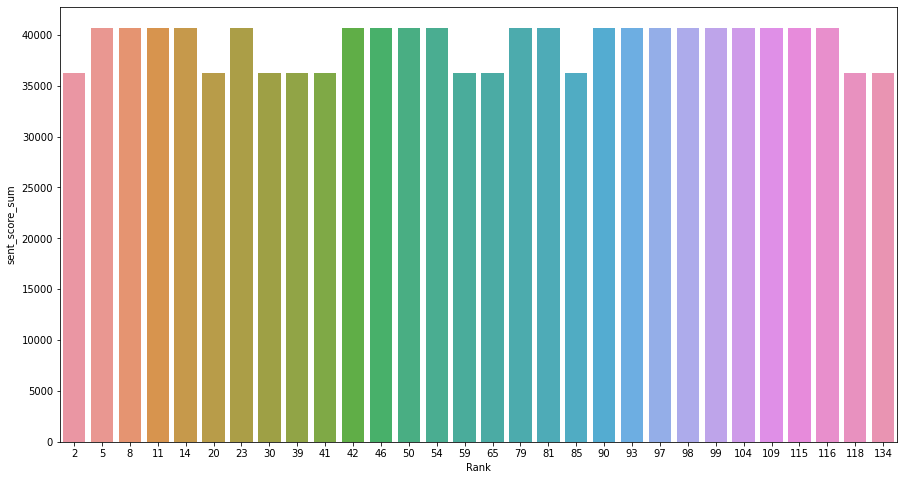

In [201]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Rank", y="sent_score_sum", data=df_sim_rank[:30])

 Top Ranks on the basis of Simmilarity score of Short & Long Description .where the similarity score is maximum i have extracted those ranks where simmilarity score is maximum

In [197]:
df.head(3)

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description_clean,Long Description_clean,sent_score,sent_score_mean_rank,Diff_in_days
0,1,browser,2.0,2020-12-16,net fast web browser,2020-12-18,the small fast secure web browser best mobile ...,one of the small fast secure web browserit be ...,83.0,73.973469,2
1,2,browser,3.0,2020-12-16,com android chrome,2020-12-18,fast simple and secure google chrome browser f...,google chrome be a fast easy to use and secure...,75.0,73.803738,2
2,3,browser,4.0,2020-12-16,com opera browser,2021-02-27,fast safe web browserfree vpn ad blocker qr co...,fast safe and private introduce the late versi...,71.0,73.223529,73


In [195]:
df['Diff_in_days']=np.abs((df['Date of Last Description Change']-df['Date']).dt.days)
df_rank_df_day=pd.DataFrame()
df_rank_df_day['Rank']=df['Rank'].unique().tolist()
df_rank_df_day['mean_diff_days']=df.groupby(['Rank'])['Diff_in_days'].transform('mean')

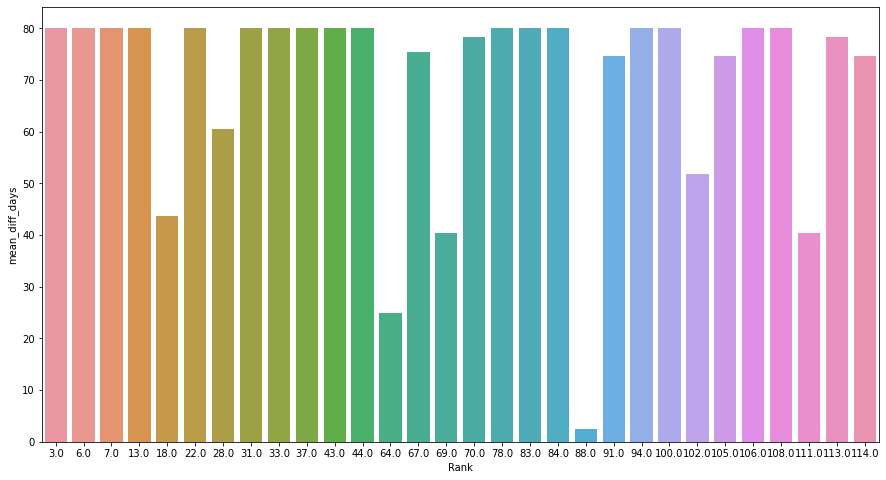

In [200]:
df_rank_df_day=df_rank_df_day.sort_values(by='mean_diff_days', ascending=True)
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Rank", y="mean_diff_days", data=df_rank_df_day[:30])

Ranks are ordered in ascending order according to the mean of difference between Date and Date of Last Description Change

In [204]:
def search_text_1(keyword,short_text):
     if (' ' + keyword + ' ') in (' ' + short_text + ' '):
         return(1)
     else:
         return(0)    

In [205]:
score_list1=[]
for index, row in df.iterrows():
        score_list1.append(search_text_1(row['Keyword'],row['Short Description_clean']))

In [207]:
score_list2=[]
for index, row in df.iterrows():
        score_list2.append(search_text_1(row['Keyword'],row['Long Description_clean']))

In [212]:
df['keyword_short_text']=score_list1
df['keyword_long_text']=score_list2
df['keyword_in_both']=np.where(df['keyword_short_text']==df['keyword_long_text'],1,0)

In [213]:
Rank_keywordPresent=df.loc[df['keyword_in_both'] == 1, 'Rank']
Rank_keywordAbsent=df.loc[df['keyword_in_both'] == 0, 'Rank']

In [218]:
print(f"The Ranks where keyword is present in both Short and Long Description together \n",Rank_keywordPresent.unique())

The Ranks where keyword is present in both Short and Long Description both
 [  2.   3.   1.  11.   8.   4.   5.  14.  96.  34.  89.  17.  43.  22.
  33.  10.  23.   6.  46.  13.  31. 100.  84.   9.  76.  40.  38.  20.
 134.  39.  65.  58.  12.  16.  59.  15.  52.  27.  78.   7.  51.  26.
  75.  62.  45.  57.  24.  85.  44.  67.  42.  90.  18.  63.  55. 109.
  81.  66.  47.  28.  79.  93.  71.  19.  48. 111.  69.  60.  37.  70.
  68.  21.  64.  29.  80.  25.  92.  73.  53.  36.  94.  61.  77.  86.
 107.  32.  83. 106.  87. 105. 110. 104.  98.  82.  95.  30.  97.  99.
  88.  72.  41.  50.  54. 101. 112.  35. 114.  91. 102. 119. 108. 103.
 117. 113.  56.  74. 118. 116. 115.]


In [219]:
print(f"The Ranks where keyword is Not present in both Short and Long Description together \n",Rank_keywordAbsent.unique())

The Ranks where keyword is Not present in both Short and Long Description together 
 [ 4.  1.  3.  6.  2.  8.  5. 11.  7. 10.  9. 14.]


In [225]:
df_app=pd.DataFrame()
df_app['App Id']=df['App ID'].unique().tolist()
df_app['Rank_Mean']=df.groupby(['App ID'])['Rank'].transform('mean')

In [227]:
df_app=df_app.sort_values(by='Rank_Mean', ascending=True)
df_app

,App Id,Rank_Mean
4,com brave browser,3.815789
5,com vivaldi browser,3.815789
6,com duckduckgo mobile android,3.815789
7,com transsion phoenix,3.815789
2,com opera browser,4.848684
3,com cloudmosa puffinTV,4.848684
0,net fast web browser,6.335526
1,com android chrome,9.697368


These are the APP ID where the Rank Mean is less and and they have good ranks 